
## **EMOTIONAL ANALYTICS IN AI**




Aim

To Develop, train and test a VGG16 Network MODEL on the FER2013 dataset to predict the facial emotions from the videos of facial emotions.

# **Objective**

1. To load the FER2013 Dataset as a CSV file using pandas.
2. To Create a Data Pipeline using Tensorflow on the dataframe.
3. To Split the dataset into train, validation, and test sets.
4. To Preprocess the dataset inorder to transform the videos in the specified   shape and to encode the class labels using one hot encoding.
5. To Visualize few samples from the dataset.
6. To Import VGG16 pre-trained model using Keras API in tensorflow.
7. To Freeze all other layers and train only the output layer.
8. To ploting the ouput and the model.
9. To find the accuracy of the output.
10. Test the output in video testing.  
11. To Evaluate the model and save the model. 



# **About VGG16 Model**


1.   VGG-16 is a convolutional neural network that is 16 layers deep.
   You can load a pretrained version of the network trained on more than a million images from the ImageNet database. 
2.   VGG16 was used to win **ILSVR(Imagenet) competition** in 2014. It is considered to be one of the excellent vision model architecture till date.
3.    Most unique thing about VGG16 is that instead of having a large number of hyper-parameter they focused on having convolution layers of 3x3 filter with a stride 1 and always used **same padding** and **maxpool layer of 2x2 filter of stride 2.**
4.   It follows this arrangement of convolution and max pool layers consistently throughout the whole architecture. In the end it has 2 FC(fully connected layers) followed by a softmax for output.
5.   The 16 in VGG16 refers to it has 16 layers that have weights. This network is a pretty large network and it has about ***138 million*** (approx) parameters.
6.    The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals.



## **References:**

[1] [Implementing Transfer Learning with VGG16](https://github.com/krishnaik06/Transfer-Learning)

[2] [Convolutional Neural Network Hyperparameters optimization for Facial Emotion Recognition](https://doi.org/10.1109/ATEE52255.2021.9425073)

[3] [Transfer learning using VGG-16 with Deep Convolutional Neural Network for Classifying Images](https://www.researchgate.net/profile/Srikanth-Tammina/publication/337105858_Transfer_learning_using_VGG-16_with_Deep_Convolutional_Neural_Network_for_Classifying_Images/links/5dc94c3ca6fdcc57503e6ad9/Transfer-learning-using-VGG-16-with-Deep-Convolutional-Neural-Network-for-Classifying-Images.pdf)

[4] [Convolutional-Neural-Network-Hyperparameters-Optimization-for-Facial-Emotion-Recognition](https://github.com/jiantenggei/Convolutional-Neural-Network-Hyperparameters-Optimization-for-Facial-Emotion-Recognition)

## **Dataset:**

URL : https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data


## **Implementation:**

## **Import modules**

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd 
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Input,Dense, Flatten,Dropout
from keras.models import Model
from tensorflow.keras.applications import VGG16

## **Download the Dataset**



In [ ]:
!gdown 13WrMBoMrjYkGg_TVKNKtJ8xtxoqhJ5qJ

Downloading...
From: https://drive.google.com/uc?id=13WrMBoMrjYkGg_TVKNKtJ8xtxoqhJ5qJ
To: /content/fer2013.csv
100% 301M/301M [00:03<00:00, 77.2MB/s]


# **Loading the Dataset**

In [ ]:
df = pd.read_csv("fer2013.csv")

In [ ]:
df.head(11)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [ ]:
df.dtypes

emotion     int64
pixels     object
Usage      object
dtype: object

In [ ]:
df["emotion"].unique()

array([0, 2, 4, 6, 3, 5, 1])

# **Preprocessing the Dataset**

In [ ]:
def preprocess(x):
    
    return (
        tf.repeat(tf.reshape(tf.strings.to_number(tf.strings.split(x["pixels"]),"float64")/255,(48,48,1)),3,axis=-1),
        tf.one_hot(x["emotion"],7,dtype="int32")
    )

# **Creating data pipeline**

In [ ]:
ds = tf.data.Dataset.from_tensor_slices(dict(df))
print(ds)

<TensorSliceDataset element_spec={'emotion': TensorSpec(shape=(), dtype=tf.int64, name=None), 'pixels': TensorSpec(shape=(), dtype=tf.string, name=None), 'Usage': TensorSpec(shape=(), dtype=tf.string, name=None)}>


In [ ]:
train_ds = ds.filter(lambda x :x["Usage"]=="Training").map(preprocess).batch(512).prefetch(tf.data.AUTOTUNE).cache()
val_ds = ds.filter(lambda x :x["Usage"]=="PublicTest").map(preprocess).batch(512).prefetch(tf.data.AUTOTUNE).cache()
test_ds = ds.filter(lambda x :x["Usage"]=="PrivateTest").map(preprocess).batch(512).prefetch(tf.data.AUTOTUNE).cache()

In [ ]:
train_ds


<CacheDataset element_spec=(TensorSpec(shape=(None, 48, 48, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 7), dtype=tf.int32, name=None))>

# **Viewing samples from dataset**

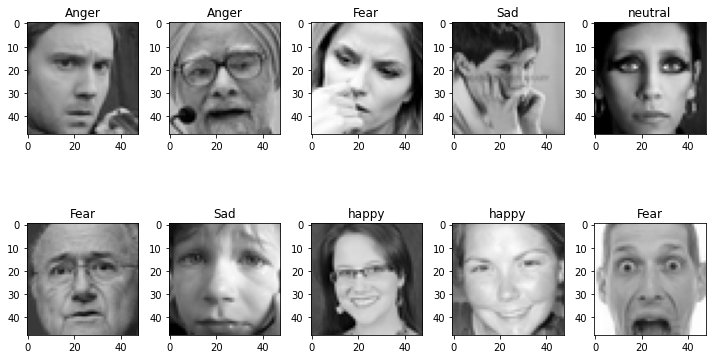

In [ ]:
emotion_name = ["Anger", "Disgust","Fear","happy","Sad","Suprise","neutral"]
plt.figure(figsize=(10,6))
for i,(image,label) in enumerate(train_ds.unbatch().take(10)):
    plt.subplot(2,5,i+1)
    plt.imshow(tf.squeeze(image),cmap="gray") # squeeze to 2d
    plt.title(emotion_name[int(tf.argmax(label))])
plt.tight_layout()

# **Import the Model**

In [ ]:
from tensorflow.keras.applications import VGG16
vgg = VGG16(weights="imagenet", include_top=False, input_shape=(48,48,3))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:

x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
x = Dense(256, activation='relu')(x)

x = Dense(128, activation='relu')(x)
Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
Dropout(0.5)(x)
prediction = Dense(7, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
history=model.fit(train_ds,validation_data = val_ds,epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)])

Epoch 1/20
57/57 [==============================] - 32s 320ms/step - loss: 1.7082 - accuracy: 0.3168 - val_loss: 1.6217 - val_accuracy: 0.3683
Epoch 2/20
57/57 [==============================] - 9s 165ms/step - loss: 1.5874 - accuracy: 0.3814 - val_loss: 1.5782 - val_accuracy: 0.3831
Epoch 3/20
57/57 [==============================] - 9s 158ms/step - loss: 1.5402 - accuracy: 0.4051 - val_loss: 1.5503 - val_accuracy: 0.3976
Epoch 4/20
57/57 [==============================] - 9s 161ms/step - loss: 1.5056 - accuracy: 0.4247 - val_loss: 1.5400 - val_accuracy: 0.4093
Epoch 5/20
57/57 [==============================] - 9s 161ms/step - loss: 1.4763 - accuracy: 0.4384 - val_loss: 1.5409 - val_accuracy: 0.4110
Epoch 6/20
57/57 [==============================] - 9s 160ms/step - loss: 1.4495 - accuracy: 0.4521 - val_loss: 1.5510 - val_accuracy: 0.4104
Epoch 7/20
57/57 [==============================] - 9s 159ms/step - loss: 1.4222 - accuracy: 0.4631 - val_loss: 1.5349 - val_accuracy: 0.4140
Epoch

# **ploting the model**

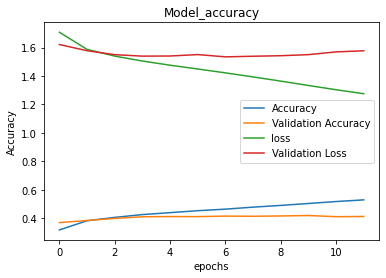

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model_accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])

# **Calculate the accuracy**

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print("Loss :", loss)
print("Accuracy : ",accuracy)

8/8 [==============================] - 2s 140ms/step - loss: 1.5146 - accuracy: 0.4227
Loss : 1.5145949125289917
Accuracy :  0.42268040776252747


# **Save the Model**

In [ ]:
#Saving the  model to  use it later on
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")

# **video tester**

In [ ]:
import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image

# **Load the models and weights**

In [ ]:
#load model
model = model_from_json(open("fer.json", "r").read())
#load weights
model.load_weights('fer.h5')

In [ ]:
face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# **Video testing**

In [ ]:
import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image

#load model
model = model_from_json(open("fer.json", "r").read())
#load weights
model.load_weights('fer.h5')


face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


cap=cv2.VideoCapture(0)

while True:
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image
    if not ret:
        continue
    gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)


    for (x,y,w,h) in faces_detected:
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
        roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
        roi_gray=cv2.resize(roi_gray,(48,48))
        img_pixels = np.asarray(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        #find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ',resized_img)



    if cv2.waitKey(10) == ord('q'):#wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows

# **Results:**

Thus the Emotion analysis from a video by using facial expression is loadded succesfully. 